In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import adfuller
# from scipy.ndimage.interpolation import shift

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [2]:
# Versões dos pacotes usados no notebook

%reload_ext watermark
%watermark -a "César S. Hooper/ Dezembro 2022" --iversions
!python --version

Author: César S. Hooper/ Dezembro 2022

cv2        : 4.5.4-dev
numpy      : 1.19.5
pandas     : 1.2.4
statsmodels: 0.12.2
matplotlib : 3.3.4
sklearn    : 0.24.1

Python 3.8.8


In [10]:
datos2 = pd.read_excel('micro emini ES 08-12 17_47.xls', sheet_name='4 hours - 1 M')[['HORA', 'CLOSE']]
datos3 = pd.read_excel('micro emini ES 08-13 17_10.xls', sheet_name='4 hours - 1 M')[['HORA', 'CLOSE']]
datos4 = pd.read_excel('micro emini ES 08-14 18_48.xls', sheet_name='4 hours - 1 M')[['HORA', 'CLOSE']]
datos5 = pd.read_excel('micro emini ES 08-15 19_08.xls', sheet_name='4 hours - 1 M')[['HORA', 'CLOSE']]
# datos6 = pd.read_excel('micro emini ES 08-19 17_41.xls', sheet_name='4 hours - 1 M')[['HORA', 'CLOSE']]

In [62]:
test = pd.concat([datos2, datos3, datos4, datos5], ignore_index=True)
test2 = pd.DataFrame()
test2['close12'] = datos2['CLOSE']
test2['close13'] = datos3['CLOSE']
test2['close14'] = datos4['CLOSE']
test2['close15'] = datos5['CLOSE']

<AxesSubplot:>

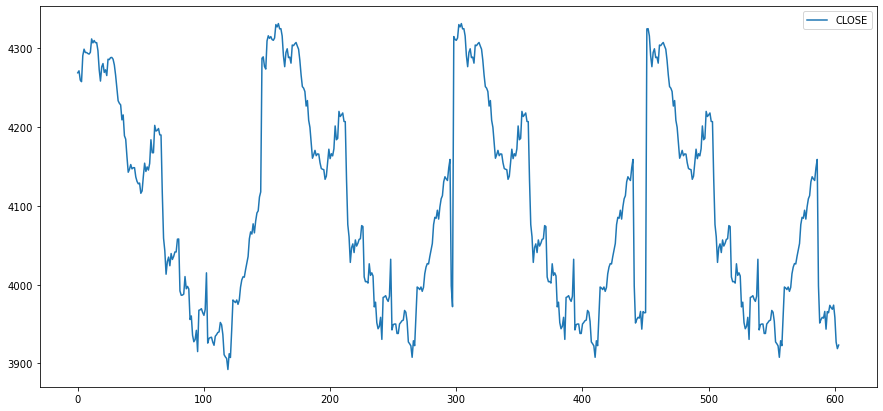

In [64]:
test.plot(figsize=(15,7))

<AxesSubplot:>

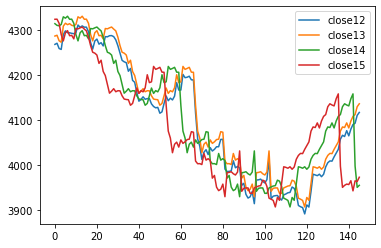

In [44]:
test2.plot()

In [38]:
datos6 = pd.read_excel('micro emini ES 08-12 17_47.xls', sheet_name='30 mins - 20 D')[['HORA', 'CLOSE']]
datos7 = pd.read_excel('micro emini ES 08-13 17_10.xls', sheet_name='30 mins - 20 D')[['HORA', 'CLOSE']]
datos8 = pd.read_excel('micro emini ES 08-14 18_48.xls', sheet_name='30 mins - 20 D')[['HORA', 'CLOSE']]
datos9 = pd.read_excel('micro emini ES 08-15 19_08.xls', sheet_name='30 mins - 20 D')[['HORA', 'CLOSE']]

In [59]:
dados30m = pd.concat([datos6, datos7, datos8, datos9], ignore_index=True)
test3 = pd.DataFrame()
test3['close12'] = datos6['CLOSE']
test3['close13'] = datos7['CLOSE']
test3['close14'] = datos8['CLOSE']
test3['close15'] = datos9['CLOSE']

<AxesSubplot:>

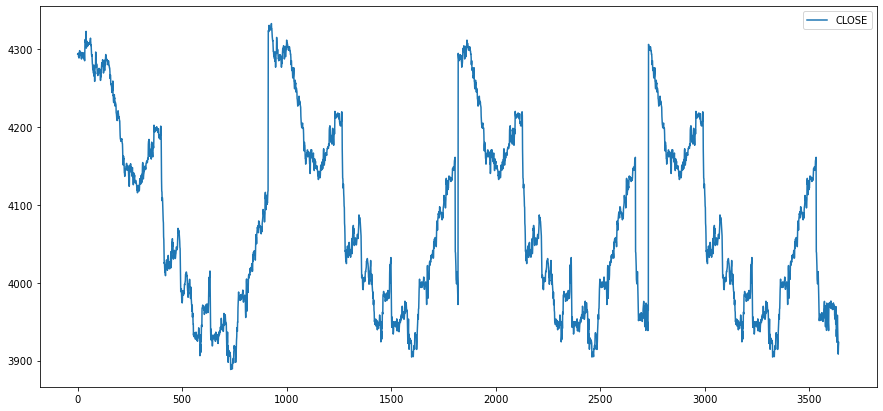

In [61]:
dados30m.plot(figsize=(15,7))


In [50]:
dados30m.shape

(3643, 2)

<AxesSubplot:>

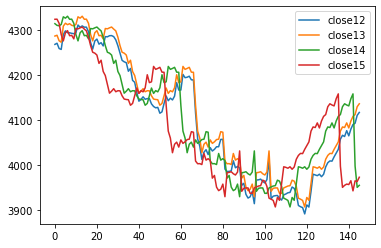

In [20]:
test2.plot()

In [34]:
test2.describe()

,close12,close13,close14,close15
count,146.000000,146.000000,146.000000,146.000000
mean,4097.678082,4114.926370,4104.059932,4086.871575
std,130.754505,131.528826,126.805792,120.492818
min,3892.250000,3907.750000,3907.750000,3907.750000
25%,3980.312500,3996.625000,3994.250000,3979.437500
50%,4079.000000,4096.625000,4083.750000,4057.875000
75%,4207.500000,4225.062500,4205.625000,4171.625000
max,4312.000000,4331.500000,4331.500000,4325.000000


In [37]:
test2.describe().loc['mean'].diff(), test2.describe().loc['std'].diff()

(close12          NaN
 close13    17.248288
 close14   -10.866438
 close15   -17.188356
 Name: mean, dtype: float64,
 close12         NaN
 close13    0.774321
 close14   -4.723034
 close15   -6.312974
 Name: std, dtype: float64)

In [33]:
def entropy(prob): [0 if k==0 else -np.log2(k)*k for k in prob].sum()